In [1]:
import numpy as np     #只需要下载numpy库即可
import random
import GridWorld_v3
from draw import draw  #绘图函数
import tqdm

In [2]:
rows = 5      #记得行数和列数这里要同步改
columns = 5
gridworld = GridWorld_v3.GridWorld_v3(forbiddenAreaScore=-10, score=1,desc = [".....",".##..","..#..",".#T#.",".#..."]) 
gridworld.show()
trajectorySteps = 1000

⬜️⬜️⬜️⬜️⬜️
⬜️🚫🚫⬜️⬜️
⬜️⬜️🚫⬜️⬜️
⬜️🚫✅🚫⬜️
⬜️🚫⬜️⬜️⬜️


# 这个代码拟合的是贝尔曼最优方程，效果非常好

In [3]:
policy = 0.2 * np.ones((rows*columns,5))
episodes = [gridworld.getTrajectoryScore(nowState = 10,action = random.randint(0,4),policy = policy) 
            for i in range(500)]

In [4]:
action_values = np.random.rand(25,5)
learning_rate = 0.01
gamma = 0.99

  0%|          | 0/100 [00:00<?, ?it/s]

⬇️🔄⬅️⬇️⬅️
⬇️⏪⏩️⬆️⬇️
⬇️⬅️⏬⬆️⬇️
🔄⏩️✅⏩️🔄
⬆️⏩️⬆️🔄⬆️


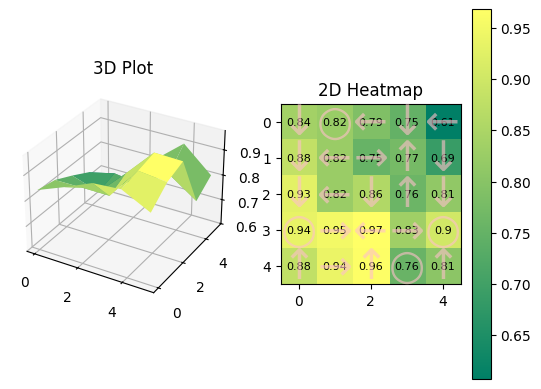

 18%|█▊        | 18/100 [00:01<00:04, 19.20it/s]

➡️➡️➡️⬇️⬇️
⬆️⏫️⏩️⬇️⬇️
⬆️⬅️⏬➡️⬇️
⬆️⏩️✅⏪⬇️
⬆️⏩️⬆️⬅️⬅️


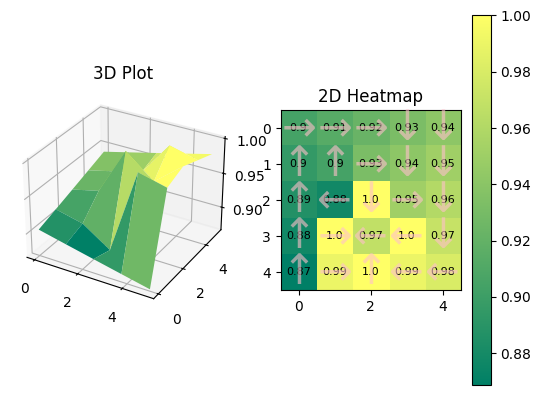

 38%|███▊      | 38/100 [00:02<00:03, 19.83it/s]

➡️➡️➡️⬇️⬇️
⬆️⏫️⏩️⬇️⬇️
⬆️⬅️⏬➡️⬇️
⬆️⏩️✅⏪⬇️
⬆️⏩️⬆️⬅️⬅️


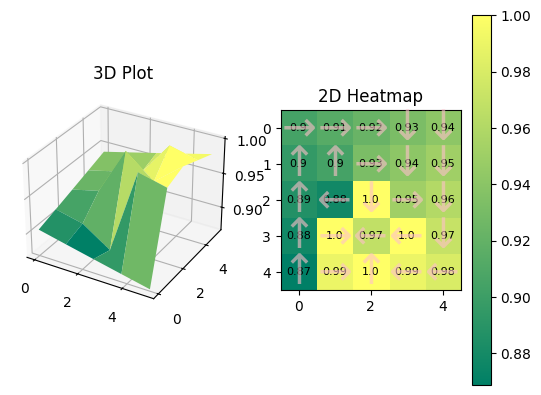

 58%|█████▊    | 58/100 [00:03<00:02, 19.68it/s]

➡️➡️➡️➡️⬇️
⬆️⏫️⏩️➡️⬇️
⬆️⬅️⏬➡️⬇️
⬆️⏩️✅⏪⬇️
⬆️⏩️⬆️⬅️⬅️


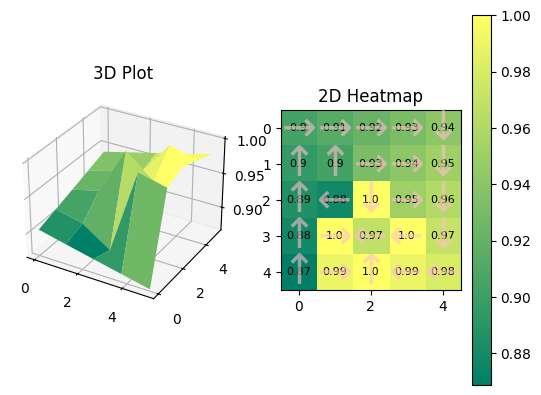

 79%|███████▉  | 79/100 [00:04<00:01, 19.85it/s]

➡️➡️➡️➡️⬇️
⬆️⏫️⏩️➡️⬇️
⬆️⬅️⏬➡️⬇️
⬆️⏩️✅⏪⬇️
⬆️⏩️⬆️⬅️⬅️


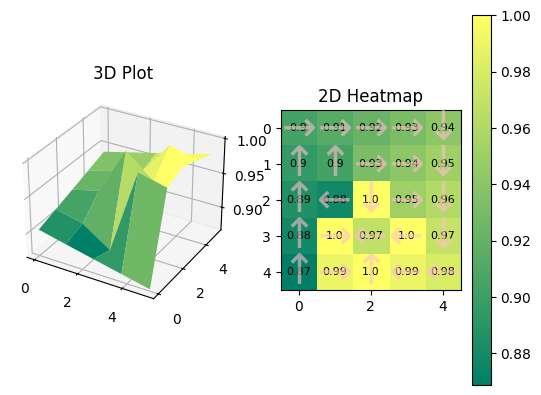

100%|██████████| 100/100 [00:05<00:00, 17.58it/s]


In [5]:
# 外层循环，使用tqdm库显示进度条，总共循环100次
for _ in tqdm.tqdm(range(100)):
    # 遍历所有的情节（episodes）
    for i in range(len(episodes)):
        # 从每个情节的最后一个时间步开始，逆序遍历
        for j in range(len(episodes[i])-1,-1,-1):
            # 获取当前时间步的轨迹信息
            trajectory = episodes[i][j]
            # 解包轨迹信息，分别得到当前状态、动作、得分、下一个状态、下一个动作和是否终止标志
            tmpstate, tmpaction, tmpscore, nextState, nextAction, terminal = trajectory
            
            # 计算下一个状态的最大动作值，和8.1.2区别在这里取了max
            next_action_value = action_values[nextState].max()
            # 计算目标值，根据贝尔曼方程更新规则
            target = tmpscore + (1.0 - terminal) * gamma * next_action_value
            # 计算时间差分（TD）误差
            TD_error = action_values[tmpstate][tmpaction] - target
            
            # 根据TD误差更新动作值函数
            action_values[tmpstate][tmpaction] -= learning_rate * TD_error

    # 每20次迭代执行一次策略和状态值的可视化操作
    if _ % 20 == 0:
        # 根据当前动作值函数生成确定性策略
        policy = np.eye(5)[np.argmax(action_values,axis=1)]
        # 显示当前策略
        gridworld.showPolicy(policy)
    
        # 计算每个状态的最大动作值，作为状态值函数
        state_values = np.max(action_values,axis=1)
        # 获取每个状态下的最优动作
        p = np.argmax(action_values,axis=1)
        # 绘制状态值函数和最优动作
        draw(state_values.reshape(5,5), p)

# 最后目标区域值不是1，而是0.9是因为它原地走也会被扣分